In [622]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import warnings
import os
import pdb
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import itertools
import pickle
import warnings
from scipy.optimize import fmin
from scipy.stats import norm
from PIL import Image
import random
import pdb
import matplotlib.colors as mcolors
import timm
import itertools
import pandas as pd
import dill
from scipy.optimize import curve_fit

warnings.filterwarnings("ignore")

## Define the networks you'll look at and their layers.
Also, define some functions that you will use later.

In [1000]:
def get_model(model_name):
    activations = []

    def get_activation(name):
        def hook(model, input, output):
            activations.append(output)
        return hook

    if model_name == 'resnet50':
        timmName = 'resnet50.tv_in1k'
        layers_to_extract = ['conv1', 'layer1.0.conv1', 'layer3.5.bn3', 'layer3.0.conv1', 'layer4.0.act3', 'fc']
        model_specs = ['cnn', 'sup']
        
    elif model_name == 'resnet18':
        timmName = 'resnet18.tv_in1k'
        layers_to_extract = ['conv1', 'layer1.0.bn1', 'layer2.0.bn2', 'layer3.0.conv2', 'layer4.0.bn1', 'fc']  # ResNet18 confirmed as valid
        model_specs = ['cnn', 'sup']
        
    elif model_name == 'resnet34':
        timmName = 'resnet34.tv_in1k'
        layers_to_extract = ['conv1', 'layer1.0.bn1', 'layer2.0.bn2', 'layer3.1.conv2', 'layer4.0.bn1', 'fc']  # ResNet18 confirmed as valid
        model_specs = ['cnn', 'sup']

    elif model_name == 'resnet101':
        timmName = 'resnet101.tv_in1k'
        layers_to_extract = ['conv1', 'layer1.0.bn1', 'layer3.0.bn2', 'layer4.0.bn1', 'layer4.0.act2', 'fc']  # ResNet18 confirmed as valid
        model_specs = ['cnn', 'sup']

    elif model_name == 'resnet50d':
        timmName = 'resnet50d.a1_in1k'
        layers_to_extract = ['conv1', 'layer1.0.conv1', 'layer3.5.bn3', 'layer3.0.conv1', 'layer4.0.act3', 'fc']
        model_specs = ['cnn', 'sup']
        
    elif model_name == 'resnetrs50':
        timmName = 'resnetrs50.tf_in1k'
        layers_to_extract = ['conv1', 'layer1.0.conv1', 'layer3.5.bn3', 'layer3.0.conv1', 'layer4.0.act3', 'fc']
        model_specs = ['cnn', 'sup']

    elif model_name == 'vgg16':
        timmName = 'vgg16.tv_in1k'
        layers_to_extract = ['features.0', 'features.4', 'features.9', 'features.16', 'features.23', 'head.fc']  # VGG16 layers confirmed
        model_specs = ['cnn', 'sup']
    
    elif model_name == 'vgg19':
        timmName = 'vgg19.tv_in1k';
        layers_to_extract = ['features.0', 'features.4', 'features.9', 'features.18', 'features.27', 'head.fc']  # VGG19 follows a similar structure to VGG16
        model_specs = ['cnn', 'sup']

    elif model_name == 'efficientnet_lite0':
        timmName = 'tf_efficientnet_lite0.in1k'
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn2', 'blocks.2.1.bn2', 'blocks.4.2.bn2', 'blocks.6.0.bn2', 'classifier'] 
        model_specs = ['cnn', 'sup']
    
    elif model_name == 'efficientnet_b0':
        timmName = 'tf_efficientnet_b0.in1k';
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn2', 'blocks.2.0.bn2', 'blocks.4.0.bn2', 'blocks.6.0.bn2', 'classifier']
        model_specs = ['cnn', 'sup']
        
    elif model_name == 'efficientnet_b1':
        timmName = 'tf_efficientnet_b1.in1k';
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn2', 'blocks.2.0.bn2', 'blocks.4.0.bn2', 'blocks.6.0.bn2', 'classifier']
        model_specs = ['cnn', 'sup']
        
    elif model_name == 'efficientnet_b2':
        timmName = 'tf_efficientnet_b2.in1k';
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn2', 'blocks.2.0.bn2', 'blocks.4.0.bn2', 'blocks.6.0.bn2', 'classifier']
        model_specs = ['cnn', 'sup']
        
    elif model_name == 'efficientnet_b3':
        timmName = 'tf_efficientnet_b3.in1k';
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn2', 'blocks.2.0.bn2', 'blocks.4.0.bn2', 'blocks.6.0.bn2', 'classifier']
        model_specs = ['cnn', 'sup']
        
    elif model_name == 'efficientnet_b4':
        timmName = 'tf_efficientnet_b4.in1k';
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn2', 'blocks.2.0.bn2', 'blocks.4.0.bn2', 'blocks.6.0.bn2', 'classifier']
        model_specs = ['cnn', 'sup']
        
    elif model_name == 'efficientnet_b5':
        timmName = 'tf_efficientnet_b5.in1k';
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn2', 'blocks.2.0.bn2', 'blocks.4.0.bn2', 'blocks.6.0.bn2', 'classifier']
        model_specs = ['cnn', 'sup']
        
    elif model_name == 'efficientnet_b6':
        timmName = 'tf_efficientnet_b6.ap_in1k';
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn2', 'blocks.2.0.bn2', 'blocks.4.0.bn2', 'blocks.6.0.bn2', 'classifier']
        model_specs = ['cnn', 'sup']
        
    elif model_name == 'efficientnet_b7':
        timmName = 'tf_efficientnet_b7.ap_in1k';
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn2', 'blocks.2.0.bn2', 'blocks.4.0.bn2', 'blocks.6.0.bn2', 'classifier']
        model_specs = ['cnn', 'sup']

    elif model_name == 'tf_efficientnetv2_s':
        timmName = 'tf_efficientnetv2_s.in1k';
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn1', 'blocks.2.0.bn1', 'blocks.4.0.bn1', 'blocks.5.0.bn1', 'classifier']  # EfficientNetV2-S confirmed (7 blocks)
        model_specs = ['cnn','sup']

    elif model_name == 'efficientnet_es':
        timmName = 'tf_efficientnet_es.in1k';
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn1', 'blocks.2.0.bn1', 'blocks.4.0.bn1', 'blocks.5.0.bn1', 'classifier']
        model_specs = ['cnn','sup']
    
    elif model_name == 'vit_base_patch8_224':
        timmName = 'vit_base_patch8_224.augreg_in21k_ft_in1k'
        layers_to_extract = ['patch_embed.proj', 'blocks.1.ls2', 'blocks.4.ls2', 'blocks.7.ls2', 'blocks.11.ls2', 'head']  # ViT model confirmed (12 blocks)
        model_specs = ['vit', 'sup']

    elif model_name == 'vit_tiny_patch16_224':
        timmName = 'vit_tiny_patch16_224.augreg_in21k_ft_in1k'
        layers_to_extract = ['patch_embed.proj', 'blocks.1.ls2', 'blocks.4.ls2', 'blocks.7.ls2', 'blocks.11.ls2', 'head']  # ViT model confirmed (12 blocks)
        model_specs = ['vit', 'sup']
        
    elif model_name == 'vit_small_patch16_224':
        timmName = 'vit_small_patch16_224.augreg_in21k_ft_in1k'
        layers_to_extract = ['patch_embed.proj', 'blocks.1.ls2', 'blocks.4.ls2', 'blocks.7.ls2', 'blocks.11.ls2', 'head']  # ViT model confirmed (12 blocks)
        model_specs = ['vit', 'sup']
        
    elif model_name == 'vit_base_patch16_224':
        timmName = 'vit_base_patch16_224.augreg_in21k_ft_in1k'
        layers_to_extract = ['patch_embed.proj', 'blocks.1.ls2', 'blocks.4.ls2', 'blocks.7.ls2', 'blocks.11.ls2', 'head']  # ViT model confirmed (12 blocks)
        model_specs = ['vit', 'sup']

    elif model_name == 'vit_large_patch16_224':
        timmName = 'vit_large_patch16_224.augreg_in21k_ft_in1k'
        layers_to_extract = ['patch_embed.proj', 'blocks.1.ls2', 'blocks.4.ls2', 'blocks.8.ls2', 'blocks.11.ls2', 'head']
        model_specs = ['vit', 'sup']

    elif model_name == 'convnext_base':
        timmName = 'convnext_base.fb_in1k'
        layers_to_extract = ['stem', 'stages.0.blocks.0.shortcut', 'stages.1.blocks.0.shortcut', 'stages.2.blocks.0.shortcut', 'stages.3.blocks.0.shortcut', 'head.fc']  # ConvNeXt Base confirmed
        model_specs = ['vit', 'sup']

    elif model_name == 'convnext_small':
        timmName = 'convnext_small.fb_in1k'
        layers_to_extract = ['stem', 'stages.0.blocks.0.shortcut', 'stages.1.blocks.0.shortcut', 'stages.2.blocks.0.shortcut', 'stages.3.blocks.0.shortcut', 'head.fc']
        model_specs = ['vit', 'sup']
        
    elif model_name == 'convnext_tiny':
        timmName = 'convnext_tiny.fb_in1k'
        layers_to_extract = ['stem', 'stages.0.blocks.0.shortcut', 'stages.1.blocks.0.shortcut', 'stages.2.blocks.0.shortcut', 'stages.3.blocks.0.shortcut', 'head.fc']
        model_specs = ['vit', 'sup']
        
    elif model_name == 'convnext_large':
        timmName = 'convnext_large.fb_in1k'
        layers_to_extract = ['stem', 'stages.0.blocks.0.shortcut', 'stages.1.blocks.0.shortcut', 'stages.2.blocks.0.shortcut', 'stages.3.blocks.0.shortcut', 'head.fc']
        model_specs = ['vit', 'sup']
    
    elif model_name == 'convnext_xlarge':
        timmName = 'convnext_xlarge.fb_in22k_ft_in1k'
        layers_to_extract = ['stem', 'stages.0.blocks.0.shortcut', 'stages.1.blocks.0.shortcut', 'stages.2.blocks.0.shortcut', 'stages.3.blocks.0.shortcut', 'head.fc']
        model_specs = ['vit', 'sup']
    
    elif model_name == 'inception_v3':
        timmName = 'inception_v3.tf_in1k'
        layers_to_extract = ['Conv2d_1a_3x3', 'Conv2d_2b_3x3', 'Mixed_5b', 'Mixed_6a', 'Mixed_7a', 'fc']  # InceptionV3 layers confirmed
        model_specs = ['cnn', 'sup']

    elif model_name == 'swin_base_patch4_window7_224':
        timmName = 'swin_base_patch4_window7_224.ms_in1k'
        layers_to_extract = ['patch_embed.proj', 'layers.0.blocks.0.mlp.fc2', 'layers.1.blocks.0.mlp.fc2', 'layers.2.blocks.0.mlp.fc2', 'layers.3.blocks.0.mlp.fc2', 'head']  # Swin Transformer (4 layers)
        model_specs = ['vit','sup']
    
    elif model_name == 'ghostnet_100':
        timmName = 'ghostnetv2_100.in1k'
        layers_to_extract = ['conv_stem', 'blocks.0', 'blocks.2', 'blocks.5', 'blocks.9', 'classifier']  # GhostNet layer structure validated (6 blocks)
        model_specs = ['cnn', 'sup']
    
    elif model_name == 'beitv2_base_patch16_224':
        timmName = 'beitv2_base_patch16_224.in1k_ft_in1k'
        layers_to_extract = ['patch_embed.proj', 'blocks.0.mlp.fc2', 'blocks.3.mlp.fc2', 'blocks.6.mlp.fc2', 'blocks.11.mlp.fc2', 'head']  # BEiT has a similar layer structure to ViT (12 blocks)
        model_specs = ['vit','sup']

    elif model_name == 'repvgg_a2':
        timmName = 'repvgg_a2.rvgg_in1k'
        layers_to_extract = ['stem', 'stages.0.1.act', 'stages.1.3.act', 'stages.2.13.act', 'stages.3.0.act', 'head.fc']  # RepVGG layer structure checked and confirmed
        model_specs = ['cnn', 'sup']
    
    elif model_name == 'mobilenetv3_large_100':
        timmName = 'tf_mobilenetv3_large_100.in1k'
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn2', 'blocks.1.1.bn3', 'blocks.2.1.bn3', 'blocks.5.1.bn3', 'classifier']  # Correct block depth for MobileNetV3 (6 blocks)
        model_specs = ['cnn', 'sup']
    
    elif model_name == 'tf_mobilenetv3_small_075':
        timmName = 'tf_mobilenetv3_small_075.in1k'
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn2', 'blocks.1.1.bn3', 'blocks.2.1.bn3', 'blocks.5.0.bn1', 'classifier']
        model_specs = ['cnn', 'sup']
    
    elif model_name == 'mobilenetv2_140':
        timmName = 'mobilenetv2_140.ra_in1k'
        layers_to_extract = ['conv_stem', 'blocks.0.0.bn2', 'blocks.1.1.bn3', 'blocks.2.1.bn3', 'blocks.5.1.bn3', 'classifier']
        model_specs = ['cnn', 'sup']
    
    elif model_name == 'densenet121':
        timmName = 'densenet121.tv_in1k'
        layers_to_extract = ['features.conv0', 'features.transition1.norm', 'features.transition2.norm', 'features.transition3.norm', 'features.norm5', 'classifier']
        model_specs = ['cnn', 'sup']
        
    elif model_name == 'densenet169':
        timmName = 'densenet169.tv_in1k'
        layers_to_extract = ['features.conv0', 'features.transition1.norm', 'features.transition2.norm', 'features.transition3.norm', 'features.norm5', 'classifier']
        model_specs = ['cnn', 'sup']
    
    elif model_name == 'regnetx_002':
        timmName = 'regnetx_002.pycls_in1k'
        layers_to_extract = ['stem.conv', 's1.b1.conv1.bn', 's2.b1.conv1.bn', 's3.b1.conv1.bn', 's4.b1.conv1.bn', 'head.fc']
        model_specs = ['cnn', 'sup']
    
    elif model_name == 'fbnetv3_b':
        timmName = 'fbnetv3_b.ra2_in1k'
        layers_to_extract = ['conv_stem', 'blocks.2.1.bn3', 'blocks.3.1.bn3', 'blocks.4.1.bn3', 'blocks.5.1.bn3', 'classifier']
        model_specs = ['cnn', 'sup']

    elif model_name == 'vit_large_patch16_224mae':
        timmName = 'vit_large_patch16_224.mae'
        layers_to_extract = ['patch_embed.proj', 'blocks.1.ls2', 'blocks.4.ls2', 'blocks.8.ls2', 'blocks.11.ls2', 'head']
        model_specs = ['vit', 'unsup']
        
    elif model_name == 'vit_base_patch16_224mae':
        timmName = 'vit_base_patch16_224.mae'
        layers_to_extract = ['patch_embed.proj', 'blocks.1.ls2', 'blocks.4.ls2', 'blocks.8.ls2', 'blocks.11.ls2', 'head']
        model_specs = ['vit', 'unsup']

    elif model_name == 'hiera_base_224mae':
        timmName = 'hiera_base_224.mae'
        layers_to_extract = ['patch_embed.proj', 'blocks.2.norm1', 'blocks.7.norm1', 'blocks.14.norm1', 'blocks.22.norm1', 'head.fc']
        model_specs = ['vit', 'unsup']

    elif model_name == 'hiera_base_plus_224mae':
        timmName = 'hiera_base_plus_224.mae'
        layers_to_extract = ['patch_embed.proj', 'blocks.2.norm1', 'blocks.7.norm1', 'blocks.14.norm1', 'blocks.22.norm1', 'head.fc']
        model_specs = ['vit', 'unsup']

    elif model_name == 'hiera_small_224mae':
        timmName = 'hiera_small_224.mae'
        layers_to_extract = ['patch_embed.proj', 'blocks.1.norm1', 'blocks.5.norm1', 'blocks.9.norm1', 'blocks.14.norm1', 'head.fc']
        model_specs = ['vit', 'unsup']

    elif model_name == 'hiera_base_224maeftin':
        timmName = 'hiera_base_224.mae_in1k_ft_in1k'
        layers_to_extract = ['patch_embed.proj', 'blocks.2.norm1', 'blocks.7.norm1', 'blocks.14.norm1', 'blocks.22.norm1', 'head.fc']
        model_specs = ['vit', 'unsupft']

    elif model_name == 'hiera_small_224maeftin':
        timmName = 'hiera_small_224.mae_in1k_ft_in1k'
        layers_to_extract = ['patch_embed.proj', 'blocks.1.norm1', 'blocks.5.norm1', 'blocks.9.norm1', 'blocks.14.norm1', 'head.fc']
        model_specs = ['vit', 'unsupft']

    elif model_name == 'hiera_base_plus_224maeftin':
        timmName = 'hiera_base_plus_224.mae_in1k_ft_in1k'
        layers_to_extract = ['patch_embed.proj', 'blocks.2.norm1', 'blocks.7.norm1', 'blocks.14.norm1', 'blocks.22.norm1', 'head.fc']
        model_specs = ['vit', 'unsupft']
    
    elif model_name == 'ssl_resnet18':
        timmName = 'ssl_resnet18'
        layers_to_extract = ['conv1', 'layer1.0.bn1', 'layer2.0.bn2', 'layer3.0.conv2', 'layer4.0.bn1', 'fc']
        model_specs = ['cnn', 'unsupft']

    elif model_name == 'ssl_resnet50':
        timmName = 'ssl_resnet50'
        layers_to_extract = ['conv1', 'layer1.0.conv1', 'layer3.5.bn3', 'layer3.0.conv1', 'layer4.0.act3', 'fc']
        model_specs = ['cnn', 'unsupft']

    elif model_name == 'swsl_resnet18':
        timmName = 'resnet18.fb_swsl_ig1b_ft_in1k'
        layers_to_extract = ['conv1', 'layer1.0.bn1', 'layer2.0.bn2', 'layer3.0.conv2', 'layer4.0.bn1', 'fc']
        model_specs = ['cnn', 'unsupft']

    elif model_name == 'swsl_resnet50':
        timmName = 'resnet50.fb_swsl_ig1b_ft_in1k'
        layers_to_extract = ['conv1', 'layer1.0.conv1', 'layer3.5.bn3', 'layer3.0.conv1', 'layer4.0.act3', 'fc']
        model_specs = ['cnn', 'unsupft']
    
    elif model_name == 'clip_largepatch':
        timmName = 'vit_large_patch14_clip_224.openai_ft_in1k'
        layers_to_extract = ['patch_embed.proj', 'blocks.2.norm1', 'blocks.7.norm1', 'blocks.14.norm1', 'blocks.22.norm1', 'head']
        model_specs = ['vit', 'sup']
    
    
    
    else:
        print(model_name)
        raise ValueError("Model name not recognized. Please choose a valid model name.")
    
    model = timm.create_model(timmName, pretrained=True)
    INacc = getINacc(timmName);
    
    model.eval()
    
    # Register hooks to capture the outputs of the selected layers
    for layer_name in layers_to_extract:
        layer = dict([*model.named_modules()])[layer_name]
        layer.register_forward_hook(get_activation(layer_name))
    
    return model, activations, layers_to_extract, model_specs, INacc


def getINacc(timmName):
    imageNetEval = pd.read_csv('pytorch-image-models/results/results-imagenet.csv')
    if imageNetEval[imageNetEval['model'] == timmName].empty:
        top1 = 'NaN'
        top5 = 'NaN'
        params = 'NaN'
    else:
        top1 = imageNetEval[imageNetEval['model'] == timmName]['top1'].values[0];
        top5 = imageNetEval[imageNetEval['model'] == timmName]['top5'].values[0];
        params = float(imageNetEval[imageNetEval['model'] == timmName]['param_count'].values[0]);
    INacc = [top1, top5, params];
    return INacc

def preprocess_image(img_path, input_size):
    preprocess = transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(img_path)
    image = preprocess(image)
    image = image.unsqueeze(0)  # Create a mini-batch as expected by the model
    return image

def load_image(img_path, input_size):
    preprocess = transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
    ])
    image = Image.open(img_path)
    image = preprocess(image)
    image = image.unsqueeze(0)  # Create a mini-batch as expected by the model
    return image

# define loss function to compute scaling values
def compute_loss(params, all_combinations, biggerDiff):
    psi = params[:11]
    sigma = params[11]
    
    # make a copy here of all the combinations
    all_combinations_copy = np.copy(all_combinations)
    all_combinations_copy = all_combinations_copy/10
    
    # replace with the psi values
    for interp_val in range(11):
        all_combinations_copy[all_combinations == interp_val] = psi[interp_val]

    # calculate the differences and probabilitys
    diffs = np.abs(all_combinations_copy[:, 0] - all_combinations_copy[:, 1]) - np.abs(all_combinations_copy[:, 2] - all_combinations_copy[:, 3])
    total_prob = 0
    for response_num in range(len(diffs)):
        if biggerDiff[response_num] == 1:
            prob_response = -np.log(norm.cdf(diffs[response_num], 0, sigma))
            total_prob += prob_response
        elif biggerDiff[response_num] == 2:
            prob_response = -np.log(1-norm.cdf(diffs[response_num], 0, sigma))
            total_prob += prob_response
    return total_prob

# Generate all pairings of numbers from 0 to 10 without repeats
pairs = list(itertools.combinations(range(11), 2))

# Now generate all combinations of two pairs and convert to a matrix
all_combinations = np.array([a + b for a, b in itertools.combinations(pairs, 2)])

In [688]:
model = timm.create_model('regnety_1280.swag_ft_in1k', pretrained=True)

model.safetensors:   0%|          | 0.00/2.58G [00:00<?, ?B/s]

### list all the models

In [1001]:
model_names = [
    'resnet50',
    'resnet18',
    'resnet34',
    'resnet101',
    'resnet50d',
    'resnetrs50',
    'vgg16',
    'vgg19',
    'efficientnet_b0',
    'efficientnet_b1',
    'efficientnet_b2',
    'efficientnet_b3',
    'efficientnet_b4',
    'efficientnet_b5',
    'efficientnet_b6',
    'efficientnet_b7',
    'efficientnet_lite0',
    'tf_efficientnetv2_s',
    'efficientnet_es',
    'vit_base_patch8_224',
    'vit_small_patch16_224',
    'vit_base_patch16_224',
    'vit_large_patch16_224',
    'convnext_base',
    'convnext_small',
    'convnext_large',
    'convnext_xlarge',
    'convnext_tiny',
    'inception_v3',
    'swin_base_patch4_window7_224',
    'ghostnet_100',
    'beitv2_base_patch16_224',
    'repvgg_a2',
    'mobilenetv3_large_100',
    'mobilenetv2_140',
    'densenet121',
    'densenet169',
    'regnetx_002',
    'tf_mobilenetv3_small_075',
    'fbnetv3_b',
    'vit_large_patch16_224mae',
    'vit_base_patch16_224mae',
    'hiera_base_224mae',
    'hiera_base_224maeftin',
    'hiera_base_plus_224mae',
    'hiera_base_plus_224maeftin',
    'hiera_small_224mae',
    'hiera_small_224maeftin',
    'resnet34',
    'resnet101',
    'ssl_resnet18',
    'ssl_resnet50',
    'swsl_resnet18',
    'swsl_resnet50',
    'clip_largepatch',
]

#model_names = [
#    'efficientnet_b1',
#    'efficientnet_b2',
#    'efficientnet_b3',
#    'efficientnet_b4',
#    'efficientnet_b5',
#    'efficientnet_b6',
#    'efficientnet_b7',
#]


#model_names = [
#    'vit_small_patch16_224',
#    'vit_base_patch16_224',
#    'vit_large_patch16_224',
#]


Big code chunk here. It will go through each model, get the activations at the specified layers to each of the interpolated images, then do mlds on all of those activations, simulating the human perceptual task. 

At the end, it will save out Psi values -- the mlds values that are fit -- for each image at each layer of each model.

In [1021]:
# if you want to wipe everything and start over, uncomment these out.
#Psis = {};
#mldsSigmas = {};
#allSpecs = {};
#allINacc = {};

#loop through all models
for model_name in model_names:
    print(model_name)
    activationLoss = 0
    fade = 0
    input_size = 224 if model_name != 'InceptionV3' else 299  # Set input size based on model
    
    # Load the model, initialize the activation hooks, and get specs/imagenet accuracy
    model, activations, layers_to_extract, model_specs, INacc = get_model(model_name)
    allSpecs[model_name] = model_specs
    allINacc[model_name] = INacc
    
#     # Name the textures, the interpolation values, and create empty dictionaries to store things
#     image1Names = ['acorns', 'grass', 'lemons', 'pebbles', 'petals', 'bees', 'iceCream', 'corn', 'guacamole', 'rubies', 'blueberries']
#     image2Names = ['redwood', 'leaves', 'bananas', 'granite', 'buttercream', 'pineapple', 'gooseFeathers', 'balloons', 'brainCoral', 'cherries', 'beads']
#     interpValues = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#     interpNames = [f"{string1}_{string2}" for string1, string2 in zip(image1Names, image2Names)]
#     allActivations = {}; allImages = {}; imageNames = []; imageIndex = 0;
    
#     # Actually go through and extract all activations
#     for interpName in interpNames:
#         for interpValue in interpValues:
#             img_path = os.path.join('out', interpName, '10x10', 
#                     f"{image1Names[imageIndex]}_{interpValue}_{image2Names[imageIndex]}_10x10_pool4_smp1.png")
#             imageName = f"{interpName}_{interpValue}"
#             # Different name if doing activation loss images
#             if activationLoss == 1:
#                 img_path = 'out_activations_bal/' + image1Names[imageIndex] + '_' + str(interpValue) + '_' + image2Names[imageIndex] + '_1x1' + '_pool4_smp1.png'
#             if fade == 1:
#                 img_path = 'fades/' + image1Names[imageIndex] + '_' + str(interpValue) + '_' + image2Names[imageIndex] + '_pool4_smp1.png'
#             #print(img_path)
#             x = preprocess_image(img_path, input_size)
#             unprocessed_image = load_image(img_path, input_size)
            
#             # Reset activations
#             activations.clear()
    
#             # Forward pass through the model
#             with torch.no_grad():
#                 model(x)
    
#             # Save outputs
#             allActivations[imageName] = [activation.numpy() for activation in activations]
#             allImages[imageName] = unprocessed_image.squeeze(0).permute(1, 2, 0).numpy()  # Save the original image
#             imageNames.append(imageName)
            
#             # Add softmax as last layer and classification as final
#             allActivations[imageName].append(scipy.special.softmax(allActivations[imageName][len(layers_to_extract)-1]))            
#             softMaxProbs = scipy.special.softmax(allActivations[imageName][len(layers_to_extract)-1]);
#             choiceIndex = np.argmax(softMaxProbs);
#             one_hot = np.zeros_like(softMaxProbs);
#             one_hot[0][choiceIndex] = 1;
#             allActivations[imageName].append(one_hot)
            
#         # Move on to next image
#         imageIndex += 1


#     ## now do the mlds
#     # pick which layers you want to look at
#     layers = range(0,len(layers_to_extract)+2)
    
#     # init a figure
#     fig = plt.figure(figsize=(15, 4*len(layers)))
#     sub = 0;

#     #create empty dicts to store psi values for each model
#     Psis[model_name] = {}
#     mldsSigmas[model_name] = {}

#     #iterate through layers, doing mlds
#     for layer in layers:
    
#         # iterate through interpolations
#         for interpPair in range(len(interpNames)):
            
#             # make an empty list to keep track
#             biggerDiff = [];
    
#             # simulate the 2AFC decisions based on cosine dissimilarity between embeddings
#             for pairings in all_combinations.astype(int):
#                 # add which interp number this is by adding amount of pairs you've iterated * num interp values
#                 pairings = tuple(x + interpPair*len(interpValues) for x in pairings)
#                 # get the index from all activations to the pairs
#                 im1 = pairings[0]; im2 = pairings[1]; im3 = pairings[2]; im4 = pairings[3];
#                 # calcuate the distances
#                 dist12 = scipy.spatial.distance.cosine(allActivations[imageNames[im1]][layer].flatten(), allActivations[imageNames[im2]][layer].flatten())
#                 dist34 = scipy.spatial.distance.cosine(allActivations[imageNames[im3]][layer].flatten(), allActivations[imageNames[im4]][layer].flatten())
#                 if dist12 > dist34:
#                     biggerDiff.append(1)
#                 elif dist34 > dist12:
#                     biggerDiff.append(2)
#                 else:
#                     biggerDiff.append(0)
            
            
#             # set up initial params
#             psi = np.arange(0, 11)/10 #np.random.rand(11)#
#             sigma = 0.2
#             initial_params = np.concatenate((psi, [sigma]))
            
#             # search for params
#             optimal_params = fmin(compute_loss, initial_params, args=(all_combinations, biggerDiff));
#             psi = optimal_params[:11]
#             psi = psi - np.min(psi)
#             psi = psi / np.max(psi)
    
#             # save the fit parameters (psi and sigma values)
#             Psis[model_name][(layer, interpPair)] = psi;
#             mldsSigmas[model_name][(layer, interpPair)] = optimal_params[11];
            
#             # plot it
#             plt.subplot(len(layers),len(image1Names),interpPair+1+sub*len(image1Names))
            
#             # iterate over interp_values
#             for interp_value in range(11):
#                 im = interpPair * len(interpValues) + interp_value
#                 plt.imshow(allImages[imageNames[im]], extent=[(interp_value ) / 10 - 0.05, (interp_value) / 10 + 0.05, psi[interp_value] - 0.05, psi[interp_value] + 0.05])
           
#             # set axis limits
#             plt.xlim([-0.05, 1.05])
#             plt.ylim([-0.05, 1.05])
#             plt.plot([0, 1], [0, 1], 'r')
    
#         sub += 1        
#     # show the plot
#     fig.supylabel('Perceptual distance value')
#     fig.supxlabel('Synthesized interpolation value')
    

resnet50
resnet18
resnet34
resnet101
resnet50d
resnetrs50
vgg16
vgg19
efficientnet_b0
efficientnet_b1
efficientnet_b2
efficientnet_b3
efficientnet_b4
efficientnet_b5
efficientnet_b6
efficientnet_b7
efficientnet_lite0
tf_efficientnetv2_s
efficientnet_es
vit_base_patch8_224
vit_small_patch16_224
vit_base_patch16_224
vit_large_patch16_224
convnext_base
convnext_small
convnext_large
convnext_xlarge
convnext_tiny
inception_v3
swin_base_patch4_window7_224
ghostnet_100
beitv2_base_patch16_224
repvgg_a2
mobilenetv3_large_100
mobilenetv2_140
densenet121
densenet169
regnetx_002
tf_mobilenetv3_small_075
fbnetv3_b
vit_large_patch16_224mae
vit_base_patch16_224mae
hiera_base_224mae
hiera_base_224maeftin
hiera_base_plus_224mae
hiera_base_plus_224maeftin
hiera_small_224mae
hiera_small_224maeftin
resnet34
resnet101
ssl_resnet18
ssl_resnet50
swsl_resnet18
swsl_resnet50
clip_largepatch


In [997]:
# load data if you aren't running the whole thing above
#dill.load_session('1014.db')

# save the data if you'd like to update it (above chunk can take a looooong time to run)
#dill.dump_session('1023.db')

Now, we'll load in the psychophysics data.

In [1044]:
##load in psychophysics data and calculate MSE
PsychophysicsData = scipy.io.loadmat(os.path.expanduser('~/Desktop/interp/texMldsGroupData3.mat'),  struct_as_record=False, squeeze_me=True)
PPdata = PsychophysicsData['data']

#texIndices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
texIndices = [0, 1, 2, 4, 5, 7, 8, 9, 10] # TAKE OUT GRANITE/PEBBLES and feathers/icecream
#texIndices = [5, 7, 8, 9, 10] #test

## calculate the human performance floor
humanMSEindividualTex = {}

for tex in texIndices:
    
    numSubjects = 0
    HumanHumanDifferences = 0;
    
    for subject1 in range(0, len(PPdata.SIDnums)):
        for subject2 in range(0, len(PPdata.SIDnums)):
            if subject1 != subject2:
                if (len(PPdata.psi[subject1]) > tex) & (len(PPdata.psi[subject2]) > tex):
                    if (len(PPdata.psi[subject1][tex]) > 0) & (len(PPdata.psi[subject2][tex]) > 0): 
                        HumanHumanDifferences += np.sum((PPdata.psi[subject1][tex] - PPdata.psi[subject2][tex])**2)
                        numSubjects+=1
                        
    if numSubjects != 0:
        humanMSEindividualTex[tex] = HumanHumanDifferences / numSubjects
    else:
        humanMSEindividualTex[tex] = 'NaN'
        
## calculate the human performance on a model that just predits 0:.1:1
humanNullMSEindividualTex = {}

for tex in texIndices:
    
    numSubjects = 0
    HumanNullDifferences = 0;
    
    for subject in range(0, len(PPdata.SIDnums)): 
        if (len(PPdata.psi[subject]) > tex):
            if (len(PPdata.psi[subject][tex]) > 0): 
                HumanNullDifferences += np.sum((PPdata.psi[subject][tex] - interpValues)**2)
                numSubjects+=1
                        
    if numSubjects != 0:
        humanNullMSEindividualTex[tex] = HumanNullDifferences / numSubjects
    else:
        humanNullMSEindividualTex[tex] = 'NaN'

Because we have Psi values from human psychophysics, and psi values from the neural network mlds simulation, we can compare them. We'll calculate the mean squared error (MSE) from the ideal (human psi = neural network psi) for each layer of each model.

In [1045]:
## calculate the differences between the neural network psi values and the human psychophysics psi values

# choose your fighter - mean squared error between psi values or cosine dissimilarity. I default MSE
MSEunits = 'squared error'
#MSEunits = 'cosine'

# initialize some colors, empty dict, indices
colors = ['brown','green','yellow','grey','pink','k','k','k','k','k','k']
MSE = {}

# MSE case
if MSEunits == 'squared error':
    for model_name in model_names:
        MSE[model_name] = np.zeros(len(layers))

        for layerIndex in range(0,len(layers)):
            MSE[model_name][layer] = 0;
            for tex in texIndices:
                #you want to count up, for each texture, total error and number of subjects
                numSubs = 0;
                texError = 0;
                for subject in range(len(PPdata.SIDnums)):
                    if (len(PPdata.psi[subject]) > tex):
                        if (len(PPdata.psi[subject][tex]) > 0):
                            #add up mean squared error from y=x for each subject
                            HumanNNdifferences = Psis[model_name][(layers[layerIndex],tex)] - PPdata.psi[subject][tex]
                            texError += np.sum(HumanNNdifferences**2)
                            numSubs += 1
                #add error divided by number of subs            
                MSE[model_name][layerIndex] += texError/numSubs


    yUnits = 'MSE between Human/NN psi'

# Cosine case
elif MSEunits == 'cosine':
    for model_name in model_names:
        MSE[model_name] = np.zeros(len(layers))

        for layerIndex in range(0,len(layers)):
            MSE[model_name][layer] = 0;
            for tex in texIndices:
                for subject in range(len(PPdata.SIDnums)):
                    if (len(PPdata.psi[subject]) > tex):
                        if (len(PPdata.psi[subject][tex]) > 0):        
                            #add up cosine distances
                            MSE[model_name][layerIndex] += scipy.spatial.distance.cosine(Psis[model_name][(layers[layerIndex],tex)], PPdata.psi[subject][tex])

    yUnits = 'Cosine distance between Human/NN psi'
    

Then, we can plot the MSE across the different layers of the model for the different models.

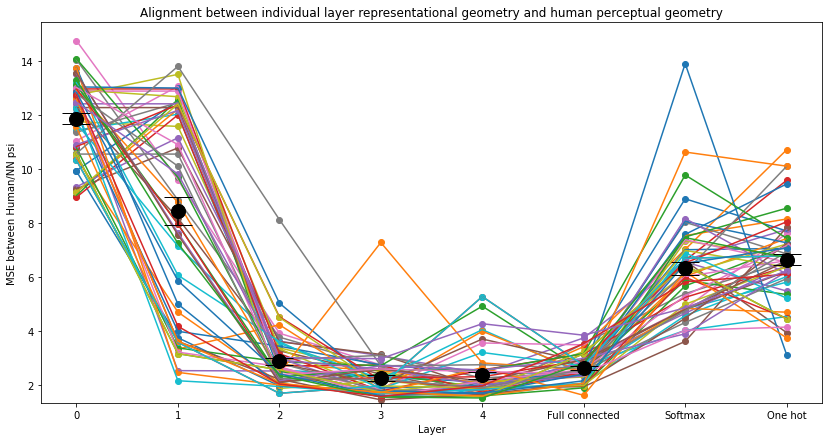

In [1046]:
## plot all models together
fig = plt.figure(figsize=(14, 7))

for model_name in model_names:
    plt.plot([0, 1, 2, 3, 4, 5, 6, 7], MSE[model_name], label = model_name)
    plt.scatter([0, 1, 2, 3, 4, 5, 6, 7], MSE[model_name])

#plt.xticks(layers, layers_to_extract)
plt.xlabel('Layer')
plt.ylabel(yUnits)
plt.title('Alignment between individual layer representational geometry and human perceptual geometry')
#plt.legend(prop={'size': 5})

# calculate and plot the averages
allMSE = np.zeros([len(model_names), len(layers)])
for model in range(0, len(model_names)):
    allMSE[model,:] = MSE[model_names[model]]

# plot the errorbars
for layer in range(0,len(layers)):
    plt.errorbar(layer, np.mean(allMSE[:,layer]), fmt = 'o',
                 yerr = np.std(allMSE[:,layer])/np.sqrt(len(model_names)),
                 color = 'k', markersize = 14,capsize = 14)
    
plt.ylim([min(np.mean(allMSE[:,:],0))*0.6, max(np.mean(allMSE[:,:],0))*1.3])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['0', '1', '2', '3', '4', 'Full connected', 'Softmax', 'One hot']);

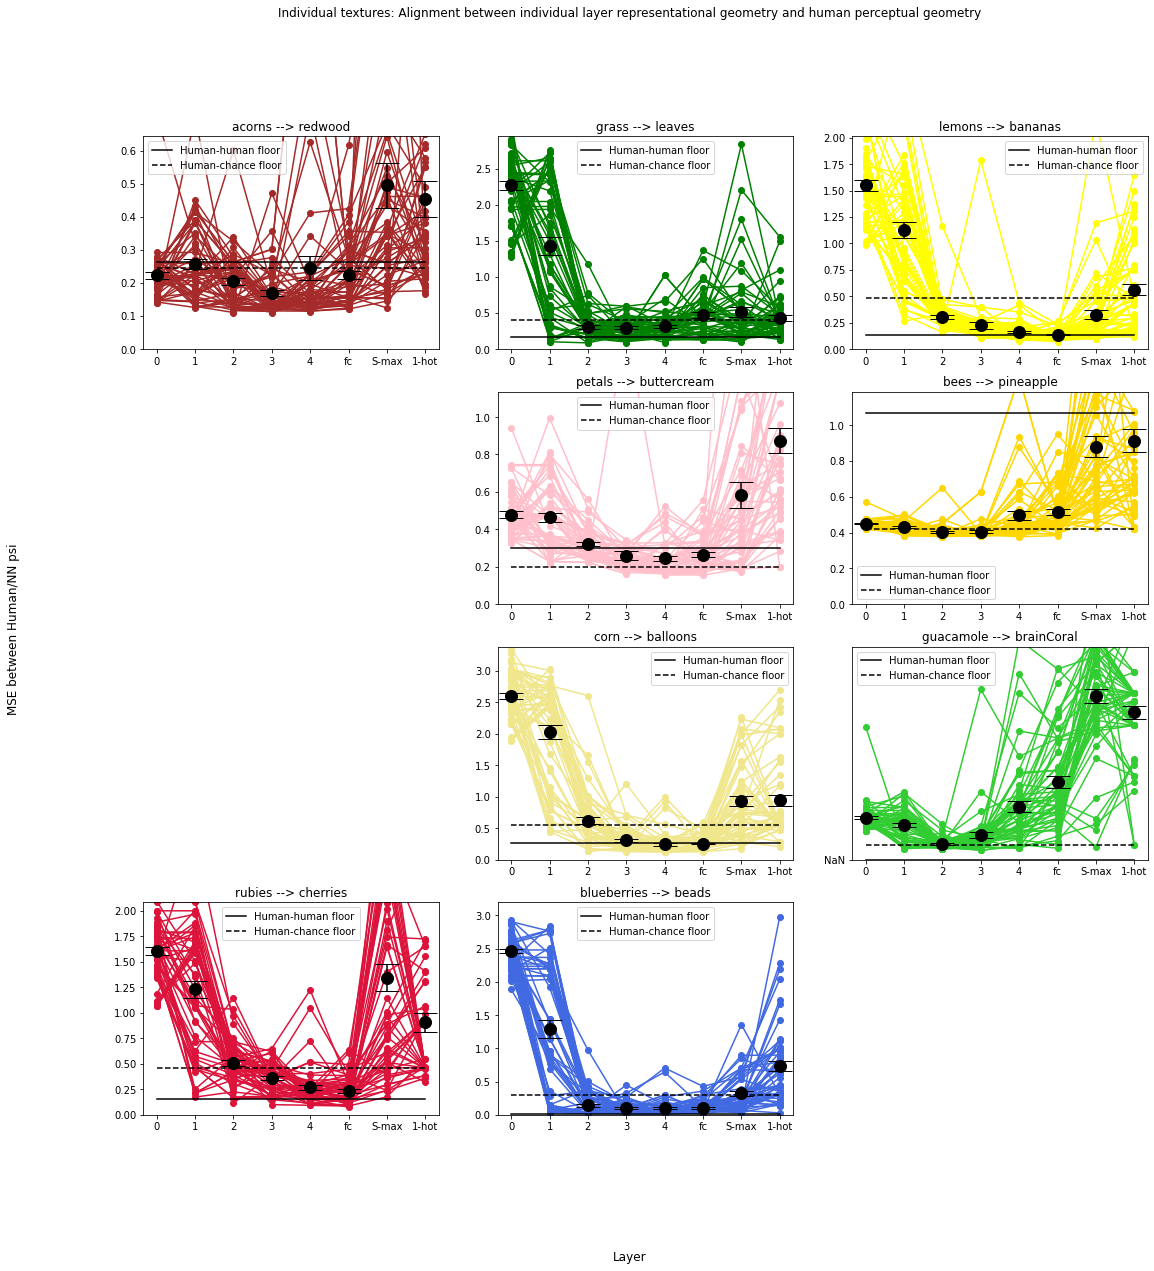

In [1047]:
#plot everything together, colored by interpolation
colors = ['brown','green','yellow','grey','pink','gold','antiquewhite','khaki','limegreen','crimson','royalblue','g']
fig = plt.figure(figsize=(18, 18))

for tex in texIndices:
    MSEindividualTex = {}
    plt.subplot(4,3,tex+1)
    
    for model_name in model_names:
        MSEindividualTex[model_name] = np.zeros(len(layers))

        for layerIndex in range(0,len(layers)):
            MSEindividualTex[model_name][layer] = 0;
            texError = 0
            numSubs = 0
            for subject in range(len(PPdata.SIDnums)):
                if (len(PPdata.psi[subject]) > tex):
                    if (len(PPdata.psi[subject][tex]) > 0):              
                        HumanNNdifferences = Psis[model_name][(layers[layerIndex],tex)] - PPdata.psi[subject][tex]
                        texError += np.sum(HumanNNdifferences**2)
                        numSubs += 1
                        
            MSEindividualTex[model_name][layerIndex] += texError / numSubs

    for model_name in model_names:
        plt.plot([0, 1, 2, 3, 4, 5, 6, 7], MSEindividualTex[model_name], label='_nolegend_', color = colors[tex])
        plt.scatter([0, 1, 2, 3, 4, 5, 6, 7], MSEindividualTex[model_name], color = colors[tex])
    
    plt.title(image1Names[tex] + ' --> ' + image2Names[tex])


    # calculate and plot the averages
    allMSEindividualTex = np.zeros([len(model_names), len(layers)])
    for model in range(0, len(model_names)):
        allMSEindividualTex[model,:] = MSEindividualTex[model_names[model]]
        
    # paired ttest between classification layer and right before
    #print(scipy.stats.ttest_rel(allMSEindividualTex[:,4], allMSEindividualTex[:,5]))


    # plot the errorbars
    for layer in range(0,len(layers)):
        plt.errorbar(layer, np.mean(allMSEindividualTex[:,layer]), fmt = 'o',
                     yerr = np.std(allMSEindividualTex[:,layer])/np.sqrt(len(model_names)),
                     color = 'k', markersize = 12,capsize = 12)
    
    # label layers and set ylim
    plt.ylim([min(np.mean(allMSEindividualTex[:,:],0))*0.7, max(np.mean(allMSEindividualTex[:,:],0))*1.3])
    plt.ylim([0, max(np.mean(allMSEindividualTex[:,:],0))*1.3])
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['0', '1', '2', '3', '4', 'fc', 'S-max', '1-hot']);
    plt.plot([0,7], [humanMSEindividualTex[tex], humanMSEindividualTex[tex]], 'black', label='Human-human floor')
    plt.plot([0,7], [humanNullMSEindividualTex[tex], humanNullMSEindividualTex[tex]], 'black', linestyle='dashed', label='Human-chance floor')
    plt.legend();
    
# Label the whole thing
fig.supxlabel('Layer')
fig.supylabel(yUnits)
plt.suptitle('Individual textures: Alignment between individual layer representational geometry and human perceptual geometry');



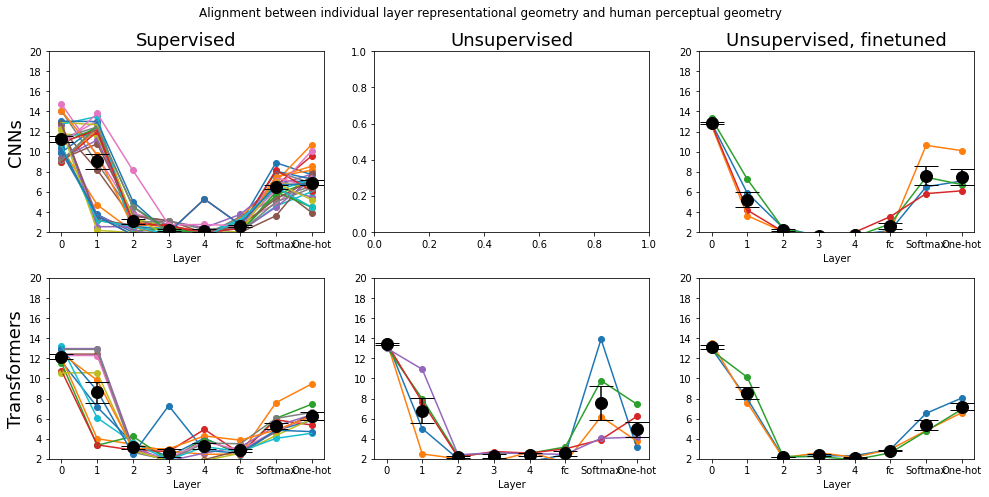

In [1048]:
# initialize dictionaries to accumulate values for averages
averages = {
    'cnn_sup': [],
    'cnn_unsup': [],
    'cnn_unsupft': [],
    'vit_sup': [],
    'vit_unsup': [],
    'vit_unsupft': []
}

# plot all models by type
fig = plt.figure(figsize=(14, 7))

# iterate through model names and plot on appropriate subplot
for model_name in model_names:
    if allSpecs[model_name] == ['cnn', 'sup']:
        plt.subplot(2, 3, 1)
        plt.title('Supervised', fontsize=18)
        plt.ylabel('CNNs', fontsize=18)
        averages['cnn_sup'].append(MSE[model_name])
    elif allSpecs[model_name] == ['cnn', 'unsup']:
        plt.subplot(2, 3, 2)
        plt.title('Unsupervised', fontsize=18)
        averages['cnn_unsup'].append(MSE[model_name])
    elif allSpecs[model_name] == ['cnn', 'unsupft']:
        plt.subplot(2, 3, 3)
        plt.title('Unsupervised, finetuned', fontsize=18)
        averages['cnn_unsupft'].append(MSE[model_name])
    elif allSpecs[model_name] == ['vit', 'sup']:
        plt.subplot(2, 3, 4)
        plt.ylabel('Transformers', fontsize=18)
        averages['vit_sup'].append(MSE[model_name])
    elif allSpecs[model_name] == ['vit', 'unsup']:
        plt.subplot(2, 3, 5)
        averages['vit_unsup'].append(MSE[model_name])
    elif allSpecs[model_name] == ['vit', 'unsupft']:
        plt.subplot(2, 3, 6)
        averages['vit_unsupft'].append(MSE[model_name])

    # actually plot the data
    plt.plot([0, 1, 2, 3, 4, 5, 6, 7], MSE[model_name], label=model_name)
    plt.scatter([0, 1, 2, 3, 4, 5, 6, 7], MSE[model_name])

    # label x axis
    plt.xlabel('Layer')
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['0', '1', '2', '3', '4', 'fc', 'Softmax', 'One-hot'])
    plt.ylim([2, 20])
    #plt.legend()

    
# plot averages on top of each subplot with errorbars
for i, key in enumerate(averages.keys()):
    if averages[key]:
        plt.subplot(2, 3, i+1)
        # calculate mean, std
        avg_mse = np.mean(averages[key], axis=0)
        std_mse = np.std(averages[key], axis=0)        
        # plot them
        plt.errorbar([0, 1, 2, 3, 4, 5, 6, 7], avg_mse, fmt = 'o',
        yerr = std_mse/np.sqrt(len(averages[key])), color = 'k', markersize = 12,capsize = 12)
             
        
# need to do this because there are no entries for unsupervised cnns
plt.subplot(2,3,2)
plt.title('Unsupervised', fontsize = 18)



        
# title graph and shape it 
plt.suptitle('Alignment between individual layer representational geometry and human perceptual geometry')
plt.tight_layout()
plt.show()


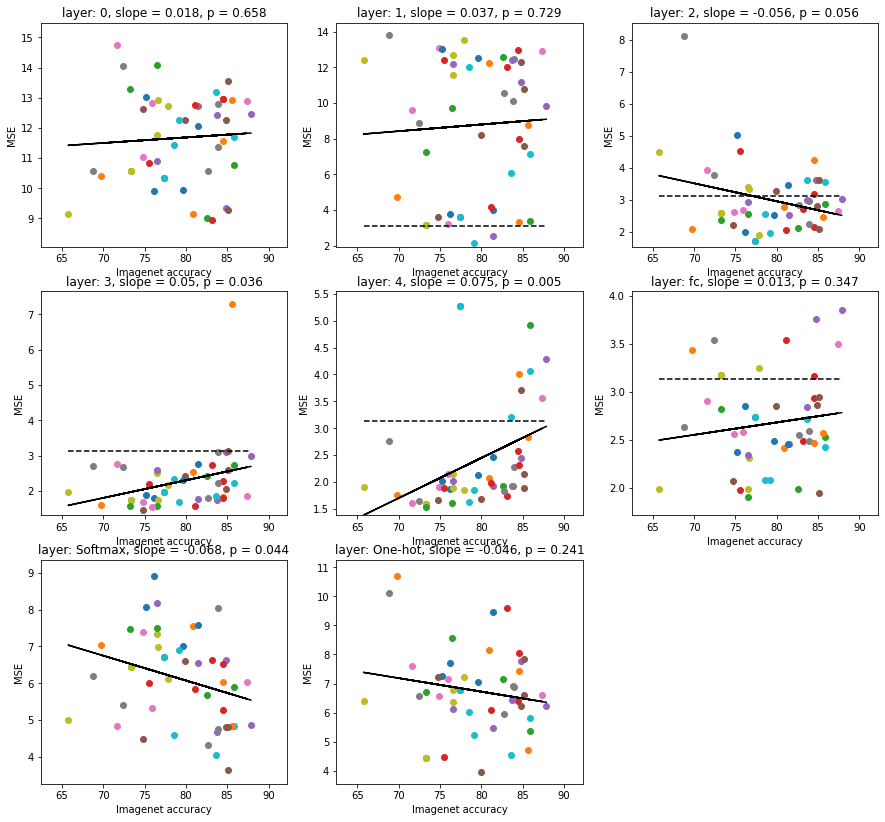

In [1049]:
plt.figure(figsize = (15,14))
layerNames = ['0', '1', '2', '3', '4', 'fc', 'Softmax', 'One-hot']
#plot for each layer
for layer in layers:
    plt.subplot(3,3,layer+1)
    x = []
    y = []
    #plot every model MSE and imagenet accuracy
    for i in range(0,len(model_names)):
        #get values
        INperformance = float(allINacc[model_names[i]][0]);
        modelLayerMSE = allMSE[i][layer]
        #plot and save into array
        plt.scatter(INperformance, modelLayerMSE)
        x.append(INperformance), y.append(modelLayerMSE)
        
    #get usable values, set limits    
    x, y = zip(*[(xi, yi) for xi, yi in zip(x, y) if isinstance(xi, (int, float)) and not np.isnan(xi)]) 
    plt.xlim(min(x)*.95, max(x)*1.05)
    plt.ylim([min(y)*.90, max(y)*1.05])
    plt.xlabel('Imagenet accuracy')
    plt.ylabel('MSE')
    
    # plot regression line, get pvalue
    plt.plot([np.min(x),np.max(x)], [sum(humanNullMSEindividualTex.values()), sum(humanNullMSEindividualTex.values())],  'black', linestyle='dashed', label='Human-chance floor')
    res = scipy.stats.linregress(x,y)
    plt.title('layer: ' + layerNames[layer] + ', slope = ' + str(round(res.slope,3)) +  ', p = ' + str(round(res.pvalue,3)))

    
    #plot the best fit line
    plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), color='black')

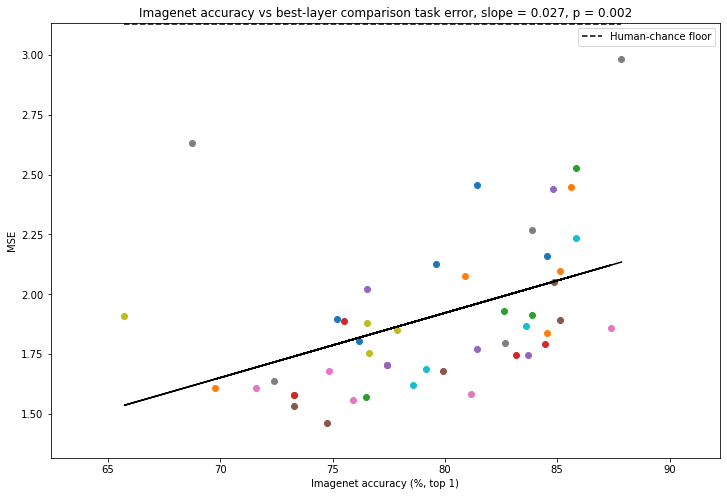

In [1050]:
plt.figure(figsize = (12,8))
#plot for each layer
x = []
y = []
#plot every model MSE and imagenet accuracy
for i in range(0,len(model_names)):
    #get values
    INperformance = allINacc[model_names[i]][0];
    modelLayerMSE = min(allMSE[i])
    if INperformance != 'NaN':
        #plot and save into array
        plt.scatter(INperformance, modelLayerMSE)
        x.append(INperformance), y.append(modelLayerMSE)

#get usable values, set limits    
plt.xlim(min(x)*.95, max(x)*1.05)
plt.ylim([min(y)*.90, max(y)*1.05])
plt.xlabel('Imagenet accuracy (%, top 1)')
plt.ylabel('MSE')
plt.title('Imagenet accuracy vs best-layer comparison task error')

#plot the best fit line
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), color='black');
plt.plot([np.min(x),np.max(x)], [sum(humanNullMSEindividualTex.values()), sum(humanNullMSEindividualTex.values())],  'black', linestyle='dashed', label='Human-chance floor');
res = scipy.stats.linregress(x,y)
plt.title('Imagenet accuracy vs best-layer comparison task error' + ', slope = ' + str(round(res.slope,3)) +  ', p = ' + str(round(res.pvalue,3)));
plt.legend()

#### Let's switch over to PSEs now. Before, we were comparing the actual distance values. These can be a little noisy, so instead, now let's compare the PSEs of the cumulative gaussian functions fit to the psi values. We can do individual textures here - for each layer, we calculate the correlation between the PSEs of all the texture interpolations found by humans vs found by the neural networks.

In [1051]:
## fit cumulative gaussian functions to the neural network data
NNmus = {}; NNsigmas = {};
for model_name in model_names:
    
    # init empty arrays
    #NNmus[model_name] = np.zeros(len(layers)); NNsigmas[model_name] = np.zeros(len(layers))
    NNmus[model_name] = np.zeros((len(layers), max(texIndices)+1))
    NNsigmas[model_name] = np.zeros((len(layers), max(texIndices)+1))
    
    # calc cumulative gaussian for each tex
    for layer in layers:
        
        
        # calc each layer
        for tex in texIndices:
            [mu, sigma] = curve_fit(norm.cdf, interpValues, Psis[model_name][layer, tex], p0=[.5,1])[0]
            #pdb.set_trace()
            NNmus[model_name][layer, tex] = mu;
            NNsigmas[model_name][layer, tex] = sigma;

In [1052]:
## calculate the differences between the neural network psi values and the human psychophysics psi values

# initialize some colors, empty dict, indices
colors = ['brown','green','yellow','grey','pink','k','k','k','k','k','k']
corrs = {}

# MSE case

for model_name in model_names:
    corrs[model_name] = np.zeros(len(layers))

    for layerIndex in range(0,len(layers)):
        NNmuTemp = [];
        SubMuTemp = []
        for tex in texIndices:
            #you want to count up, for each texture, total error and number of subjects
            numSubs = 0;
            for subject in range(len(PPdata.SIDnums)):
                if (len(PPdata.psi[subject]) > tex):
                    if (len(PPdata.psi[subject][tex]) > 0):
                        #add up mean squared error from y=x for each subject
                        NNmuTemp.append(NNmus[model_name][layerIndex, tex])
                        SubMuTemp.append(PPdata.PSE[subject][tex])
                        numSubs += 1
            #add error divided by number of subs            
        corrs[model_name][layerIndex] = np.corrcoef(NNmuTemp, SubMuTemp)[0,1];





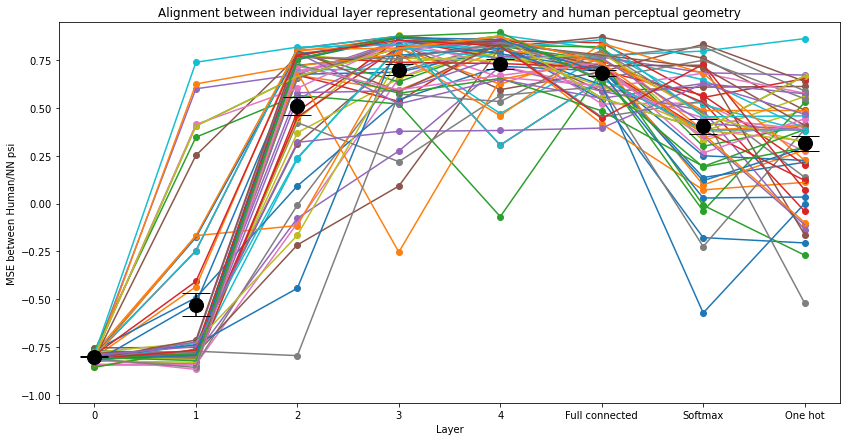

In [1053]:
## plot all models together
fig = plt.figure(figsize=(14, 7))

for model_name in model_names:
    plt.plot([0, 1, 2, 3, 4, 5, 6, 7], corrs[model_name], label = model_name)
    plt.scatter([0, 1, 2, 3, 4, 5, 6, 7], corrs[model_name])

#plt.xticks(layers, layers_to_extract)
plt.xlabel('Layer')
plt.ylabel(yUnits)
plt.title('Alignment between individual layer representational geometry and human perceptual geometry')
#plt.legend(prop={'size': 5})

# calculate and plot the averages
allCorrs = np.zeros([len(model_names), len(layers)])
for model in range(0, len(model_names)):
    allCorrs[model,:] = corrs[model_names[model]]

# plot the errorbars
for layer in range(0,len(layers)):
    plt.errorbar(layer, np.mean(allCorrs[:,layer]), fmt = 'o',
                 yerr = np.std(allCorrs[:,layer])/np.sqrt(len(model_names)),
                 color = 'k', markersize = 14,capsize = 14)
    
plt.ylim([min(np.mean(allCorrs[:,:],0))*1.3, max(np.mean(allCorrs[:,:],0))*1.3])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['0', '1', '2', '3', '4', 'Full connected', 'Softmax', 'One hot']);

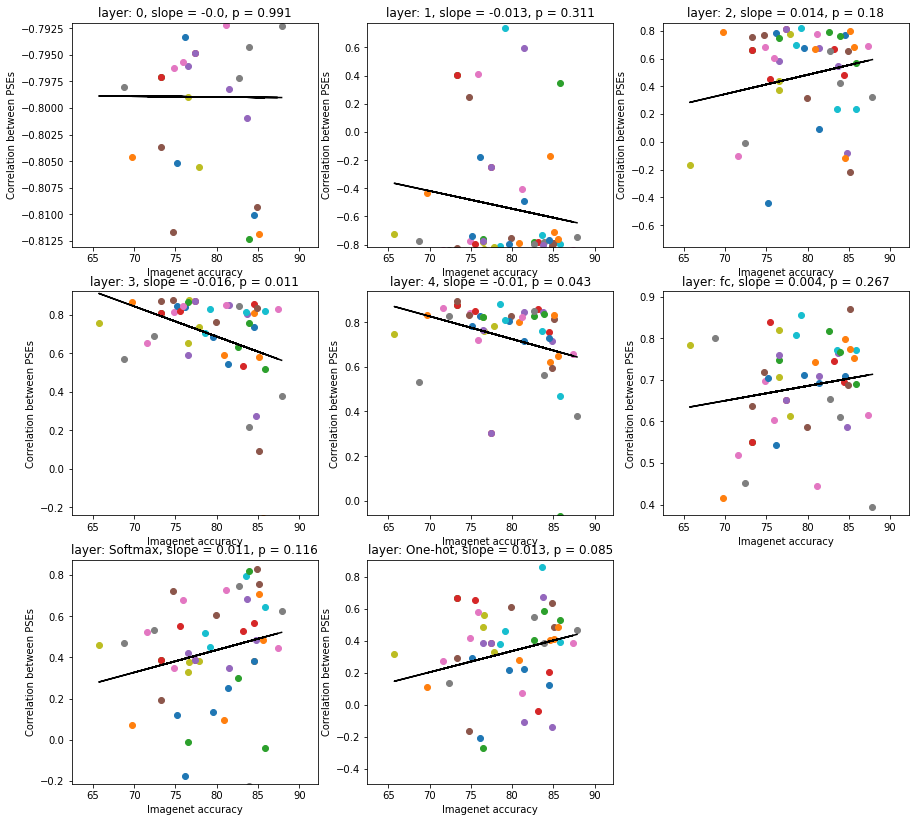

In [1054]:
plt.figure(figsize = (15,14))
layerNames = ['0', '1', '2', '3', '4', 'fc', 'Softmax', 'One-hot']
#plot for each layer
for layer in layers:
    plt.subplot(3,3,layer+1)
    x = []
    y = []
    #plot every model corr and imagenet accuracy
    for i in range(0,len(model_names)):
        #get values
        INperformance = allINacc[model_names[i]][0];
        modelLayerCorr = allCorrs[i][layer]
        if INperformance != 'NaN':
        #plot and save into array
            plt.scatter(INperformance, modelLayerCorr)
            x.append(INperformance), y.append(modelLayerCorr)
        
    #get usable values, set limits    
    plt.xlim(min(x)*.95, max(x)*1.05)
    plt.ylim([min(y)*.95, max(y)*1.05])
    plt.xlabel('Imagenet accuracy')
    plt.ylabel('Correlation between PSEs')
    
    # plot regression line, get pvalue
    res = scipy.stats.linregress(x,y)
    plt.title('layer: ' + layerNames[layer] + ', slope = ' + str(round(res.slope,3)) +  ', p = ' + str(round(res.pvalue,3)))

    
    #plot the best fit line
    plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), color='black')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


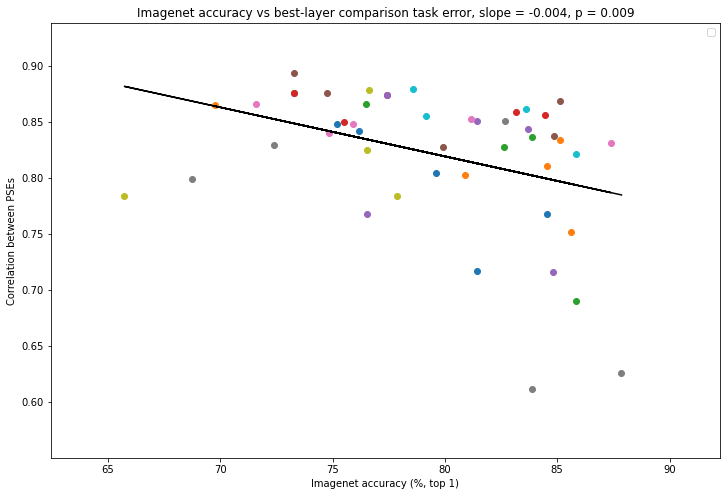

In [1055]:
plt.figure(figsize = (12,8))
#plot for each layer
x = []
y = []
#plot every model corr and imagenet accuracy
for i in range(0,len(model_names)):
    #get values
    INperformance = allINacc[model_names[i]][0];
    modelLayerCorr = max(allCorrs[i])
    if INperformance != 'NaN':
        #plot and save into array
        plt.scatter(INperformance, modelLayerCorr)
        x.append(INperformance), y.append(modelLayerCorr)

#get usable values, set limits    
plt.xlim(min(x)*.95, max(x)*1.05)
plt.ylim([min(y)*.90, max(y)*1.05])
plt.xlabel('Imagenet accuracy (%, top 1)')
plt.ylabel('Correlation between PSEs')
plt.title('Imagenet accuracy vs best-layer comparison task error')

#plot the best fit line
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), color='black');
#plt.plot([np.min(x),np.max(x)], [sum(humanNullMSEindividualTex.values()), sum(humanNullMSEindividualTex.values())],  'black', linestyle='dashed', label='Human-chance floor');
res = scipy.stats.linregress(x,y)
plt.title('Imagenet accuracy vs best-layer comparison task error' + ', slope = ' + str(round(res.slope,3)) +  ', p = ' + str(round(res.pvalue,3)));
plt.legend()